In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('Supply_Chain_Shipment_Pricing_Data.csv', delimiter = ',')

In [3]:
df

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",True,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,True,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",True,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",False,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,True,643,Freight Included in Commodity Cost,NaN


In [4]:
df1 = df[['line item value', 'freight cost (usd)', 'line item insurance (usd)']]

In [5]:
df1.head(10)

,line item value,freight cost (usd),line item insurance (usd)
0,551.00,780.34,NaN
1,6200.00,4521.5,NaN
2,40000.00,1653.78,NaN
3,127360.80,16007.06,NaN
4,121600.00,45450.08,NaN
5,2225.60,5920.42,NaN
6,4374.00,Freight Included in Commodity Cost,NaN
7,60834.55,6212.41,NaN
8,532.35,See ASN-93 (ID#:1281),NaN
9,115080.00,Freight Included in Commodity Cost,NaN


In [6]:
df1.dtypes

line item value              float64
freight cost (usd)            object
line item insurance (usd)    float64
dtype: object

In [7]:
df1['freight cost (usd)'] = pd.to_numeric(df1['freight cost (usd)'], errors='coerce')

C:\Users\housh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 3 columns):
line item value              10324 non-null float64
freight cost (usd)           6198 non-null float64
line item insurance (usd)    10037 non-null float64
dtypes: float64(3)
memory usage: 242.0 KB


In [9]:
# Claculating median for freight cost and line item insurance variables
median_freight = math.floor(df1['freight cost (usd)'].median())
median_insurance = math.floor(df1['line item insurance (usd)'].median())

In [10]:
# Replacing NaN values with median
df1['freight cost (usd)'] = df1['freight cost (usd)'].fillna(median_freight)
df1['line item insurance (usd)'] = df1['line item insurance (usd)'].fillna(median_insurance)
df1

C:\Users\housh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\housh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,line item value,freight cost (usd),line item insurance (usd)
0,551.00,780.34,47.00
1,6200.00,4521.50,47.00
2,40000.00,1653.78,47.00
3,127360.80,16007.06,47.00
4,121600.00,45450.08,47.00
5,2225.60,5920.42,47.00
6,4374.00,5869.00,47.00
7,60834.55,6212.41,47.00
8,532.35,5869.00,47.00
9,115080.00,5869.00,47.00


In [11]:
df1.describe()

,line item value,freight cost (usd),line item insurance (usd)
count,1.032400e+04,10324.000000,10324.000000
mean,1.576506e+05,9011.366080,234.749090
std,3.452921e+05,12517.294235,494.209309
min,0.000000e+00,0.750000,0.000000
25%,4.314593e+03,4323.807500,7.030000
50%,3.047147e+04,5869.000000,47.000000
75%,1.664471e+05,7707.640000,241.750000
max,5.951990e+06,289653.200000,7708.440000


In [12]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

In [13]:
# Sobol Sensitivity Analysis
problem = {
'num_vars': 3,
'names': ['freight cost', 'line item value', 'line item insurance'],
'bounds': [
    [df1['freight cost (usd)'].min(), df1['freight cost (usd)'].max()],
    [df1['line item value'].min(), df1['line item value'].max()],
    [df1['line item insurance (usd)'].min(), df1['line item insurance (usd)'].max()]
]
}

param_values = saltelli.sample(problem, 1000)

Y = Ishigami.evaluate(param_values)

Si = sobol.analyze(problem, Y, print_to_console=True)
print(Si)

Parameter S1 S1_conf ST ST_conf
freight cost 0.372147 0.091737 0.898395 0.154502
line item value 0.000000 0.000000 0.000000 0.000000
line item insurance -0.002999 0.115813 0.640146 0.067415

Parameter_1 Parameter_2 S2 S2_conf
freight cost line item value -0.004001 0.064395
freight cost line item insurance 0.657649 0.183566
line item value line item insurance -0.000000 0.000000
{'S1': array([ 3.72146907e-01,  8.04619640e-17, -2.99927615e-03]), 'S1_conf': array([9.17372344e-02, 2.75611150e-15, 1.15813365e-01]), 'ST': array([8.98395218e-01, 8.51426523e-28, 6.40146472e-01]), 'ST_conf': array([1.54501974e-01, 1.09541577e-28, 6.74150255e-02]), 'S2': array([[            nan, -4.00148505e-03,  6.57649206e-01],
       [            nan,             nan, -1.04777298e-15],
       [            nan,             nan,             nan]]), 'S2_conf': array([[           nan, 6.43951202e-02, 1.83565929e-01],
       [           nan,            nan, 4.24191380e-15],
       [           nan,            nan,  

In [14]:
from SALib.sample import morris
from SALib.analyze import morris

In [15]:
# Method of Morris
problem = {
'num_vars': 3,
'names': ['freight cost', 'line item value', 'line item insurance'],
'bounds': [
    [df1['freight cost (usd)'].min(), df1['freight cost (usd)'].max()],
    [df1['line item value'].min(), df1['line item value'].max()],
    [df1['line item insurance (usd)'].min(), df1['line item insurance (usd)'].max()]
]
}

X = saltelli.sample(problem, 1000, calc_second_order=True, seed=None)

Y = Ishigami.evaluate(param_values)

#for i in range(len(param_values)):
#for i, X in enumerate(param_values):
   # Y[i] = sum(param_values[i])


    #Y[i] = sum(X)

Si = morris.analyze(problem, X, Y, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=100)
print(Si)

Parameter                         Mu_Star         Mu    Mu_Star_Conf      Sigma
freight cost                   113870719015486.484 2428723811589.328 8854925322148.055 231361728789654.438
line item value                113572765319635.953 -790613306292.314 6757834915023.386 185917449462582.344
line item insurance            117395739504208.500 -4328926172285.646 7139061012540.589 197126084029999.562
{'names': ['freight cost', 'line item value', 'line item insurance'], 'mu': array([ 2.42872381e+12, -7.90613306e+11, -4.32892617e+12]), 'mu_star': array([1.13870719e+14, 1.13572765e+14, 1.17395740e+14]), 'sigma': array([2.31361729e+14, 1.85917449e+14, 1.97126084e+14]), 'mu_star_conf': [8854925322148.055, 6757834915023.386, 7139061012540.589]}


In [16]:
from SALib.sample import fast_sampler
from SALib.analyze import fast

In [31]:
# Fourier Amplitude Sensitivity Test
problem = {
'num_vars': 3,
'names': ['freight cost', 'line item value', 'line item insurance'],
'bounds': [
    [df1['freight cost (usd)'].min(), df1['freight cost (usd)'].max()],
    [df1['line item value'].min(), df1['line item value'].max()],
    [df1['line item insurance (usd)'].min(), df1['line item insurance (usd)'].max()]
]
}

param_values = fast_sampler.sample(problem, 1000)

Y = Ishigami.evaluate(param_values)


Si = fast.analyze(problem, Y, print_to_console=True)
print(Si)

Parameter First Total
freight cost 0.000391 0.985805
line item value 0.002875 0.996057
line item insurance 0.000030 0.930516
{'S1': [0.00039108421755652866, 0.0028749579996179826, 3.008145497050406e-05], 'ST': [0.9858048142497462, 0.9960573611114001, 0.9305158971881752], 'names': ['freight cost', 'line item value', 'line item insurance']}


In [32]:
from SALib.sample import latin
from SALib.analyze import rbd_fast

In [29]:
# Random Balance Designs - Fourier Amplitude Sensitivity Test (RBD-FAST)
problem = {
'num_vars': 3,
'names': ['freight cost', 'line item value', 'line item insurance'],
'bounds': [
    [df1['freight cost (usd)'].min(), df1['freight cost (usd)'].max()],
    [df1['line item value'].min(), df1['line item value'].max()],
    [df1['line item insurance (usd)'].min(), df1['line item insurance (usd)'].max()]
]
}

param_values = latin.sample(problem, 1000)

Y = Ishigami.evaluate(param_values)


Si = rbd_fast.analyze(problem, Y, param_values, print_to_console=False)
print(Si)

{'S1': [-0.0019300897782420154, 0.012301171404176598, 0.018366866702459246], 'names': ['freight cost', 'line item value', 'line item insurance']}


In [25]:
from SALib.analyze import dgsm
from SALib.sample import finite_diff

In [21]:
# Derivative-based Global Sensitivity Measure (DGSM)
problem = {
'num_vars': 3,
'names': ['freight cost', 'line item value', 'line item insurance'],
'bounds': [
    [df1['freight cost (usd)'].min(), df1['freight cost (usd)'].max()],
    [df1['line item value'].min(), df1['line item value'].max()],
    [df1['line item insurance (usd)'].min(), df1['line item insurance (usd)'].max()]
]
}

param_values = finite_diff.sample(problem, 1000, delta=0.001)

Y = Ishigami.evaluate(param_values)


Si = dgsm.analyze(problem, param_values, Y, conf_level=0.95, print_to_console=False)
print(Si)

{'vi': array([9.35148632e+25, 4.81277473e-04, 2.40821413e+21]), 'vi_std': array([1.98831781e+27, 7.64832891e-03, 5.15325276e+21]), 'dgsm': array([1.14870183e+08, 2.49627389e-19, 2.09507874e+00]), 'dgsm_conf': array([1.20992428e+26, 4.74236056e-04, 3.14046407e+20]), 'names': ['freight cost', 'line item value', 'line item insurance']}


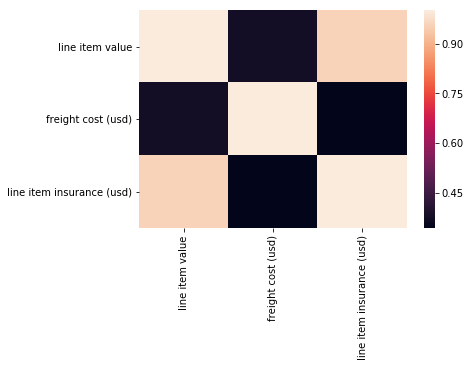

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [23]:
corr

,line item value,freight cost (usd),line item insurance (usd)
line item value,1.000000,0.376329,0.958325
freight cost (usd),0.376329,1.000000,0.344819
line item insurance (usd),0.958325,0.344819,1.000000
